# Project Title: Retail Strategy and Analytics: Optimization of Control Stores for Sales Enhancement

**Introduction:**

In this project, we aim to optimize the performance of retail chain stores by establishing control stores based on their performance compared to selected trial stores. By leveraging data analytics and strategic insights, we seek to enhance sales revenue and drive growth within the retail chain.

**Problem Statement:**

The retail industry faces challenges in understanding customer behavior and optimizing store performance to maximize sales revenue. Without proper insights and strategic planning, retail chains may struggle to identify target customer segments and make informed decisions for category review and expansion.

In [3]:
#Importing the necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
from datetime import timedelta
import re

plt.style.use('ggplot')

#### Loading purchase behaviour and transaction datasets

In [4]:
purchase = pd.read_csv('Purchase_Behaviour.csv')
trans = pd.read_excel('Transaction_data.xlsx')

## 1. Transaction Data

In [5]:
trans.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [6]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


<b>The date column is in an integer format. We need to change this to a date format.</b>

In [11]:
# Making a datetime column from DATE column

trans['date_modified'] = pd.to_datetime(trans['DATE'], origin='1899-12-30', unit='D').dt.to_pydatetime()

In summary, the code line **trans['date_modified'] = pd.to_datetime(trans['DATE'], origin='1899-12-30', unit='d').dt.to_pydatetime()** takes the integer values in the 'DATE' column of the DataFrame trans, interprets them as dates starting from 1899-12-30, converts them into Pandas Timestamp objects, and then further converts them into Python's datetime objects, storing the result in a new column named 'date_modified'.


In [12]:
trans_id_dedupped = trans['TXN_ID'].drop_duplicates()

In [13]:
print('Total TXN_IDs before dropping duplicates : {}'.format(trans.shape[0]))
print('Total TXN_IDs after dropping duplicates : {}'.format(trans_id_dedupped.shape[0]))

Total TXN_IDs before dropping duplicates : 264836
Total TXN_IDs after dropping duplicates : 263127


In [14]:
# Quantity of products sold at the chain of stores

products = trans['PROD_NAME'].value_counts().reset_index()

In [16]:
products.rename(columns={'index' : 'PROD_NAME', 'PROD_NAME' : 'Qty'}, inplace=True)

In [17]:
products

,Qty,count
0,Kettle Mozzarella Basil & Pesto 175g,3304
1,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3296
2,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,3269
3,Tyrrells Crisps Ched & Chives 165g,3268
4,Cobs Popd Sea Salt Chips 110g,3265
...,...,...
109,RRD Pc Sea Salt 165g,1431
110,Woolworths Medium Salsa 300g,1430
111,NCC Sour Cream & Garden Chives 175g,1419
112,French Fries Potato Chips 175g,1418


### Checking for null values in the transaction dataset

In [18]:
trans.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
date_modified     0
dtype: int64

There are no null values in the dataset !

<b>Statistics of the metric columns in the transaction dataset</b>

In [19]:
trans.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,date_modified
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000,264836
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200,2018-12-30 00:52:12.879215616
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000,2018-07-01 00:00:00
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000,2018-09-30 00:00:00
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000,2018-12-30 00:00:00
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000,2019-03-31 00:00:00
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000,2019-06-30 00:00:00
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226,NaN


In the above statistics we find an <b>outlier</b> in the <b>PROD_QTY</b> column. We see the max PROD_QTY value is 200 while till 75% percentile the value is 2. We need to investigate this transactions.

In [20]:
# Filter transactions where PROD_QTY = 200

trans[trans['PROD_QTY']==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,date_modified
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,2018-08-19
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,2019-05-20


We find that one customer have done two transactions of purchase of Dorito Corn Chp Supreme 380 g with PROD_QTY 200.

The purchase transactions donot seem to be ordinary retail transaction. The customer may have purchased the product in bulk amount for commercial purposes, hence we will drop this customer records.

In [21]:
# Fetching the index in dataframe for that customer 226000
# Index to drop from dataframe

cust_to_drop = trans[trans['LYLTY_CARD_NBR']==226000].index

In [22]:
trans.drop(cust_to_drop, inplace=True)

<b>Number of transactions happened over time</b>

In [23]:
trans_over_time = trans[['date_modified']].groupby(['date_modified']).size().reset_index().sort_values(['date_modified'])

the code line **trans_over_time = trans[['date_modified']].groupby(['date_modified']).size().reset_index().sort_values(['date_modified'])** creates a DataFrame trans_over_time that shows the count of occurrences of each unique 'date_modified' value in the original DataFrame trans. The data is grouped by 'date_modified', the index is reset, and the resulting DataFrame is sorted chronologically based on 'date_modified'. This type of operation is often used to analyze trends or patterns over time in a dataset.


In [24]:
trans_over_time.rename(columns={0:'Num_Transactions'}, inplace=True)

In [25]:
trans_over_time

,date_modified,Num_Transactions
0,2018-07-01,724
1,2018-07-02,711
2,2018-07-03,722
3,2018-07-04,714
4,2018-07-05,712
...,...,...
359,2019-06-26,723
360,2019-06-27,709
361,2019-06-28,730
362,2019-06-29,745


In [26]:
print("Total number of dates on which transactions happened : {}".format(trans_over_time.shape[0]))

Total number of dates on which transactions happened : 364


In [27]:
print("Max Transaction Date : {}".format(np.max(trans['date_modified'])))
print("Min Transaction Date : {}".format(np.min(trans['date_modified'])))
days_between = np.max(trans['date_modified'])-np.min(trans['date_modified'])+timedelta(days=1)
print("Days between Max and Min Transaction dates : {}".format(days_between.days))

Max Transaction Date : 2019-06-30 00:00:00
Min Transaction Date : 2018-07-01 00:00:00
Days between Max and Min Transaction dates : 365


<b>Over the year transactions happened on 364 days out of 365 days, we need to find out the day when there were no transaction. On one day there were no transactions</b>

In [28]:
# Creating a date sequence

start = datetime.strptime("2018-07-01", "%Y-%m-%d")
end = datetime.strptime("2019-06-30", "%Y-%m-%d")
date_generated = [start + timedelta(days=x) for x in range(0, (end-start+timedelta(1)).days)]

In [29]:
date_seq = pd.DataFrame(date_generated)

In [30]:
date_seq.rename(columns={0:'Date'}, inplace=True)

In [31]:
missing_date_trans = pd.merge(date_seq, trans_over_time, left_on='Date', right_on='date_modified', how='left')

In [32]:
missing_date_trans[missing_date_trans['Num_Transactions'].isnull()]

,Date,date_modified,Num_Transactions
177,2018-12-25,NaT,NaN


On <b> Christmas</b> there were no transactions. This may be due to national / festive holiday for the stores.

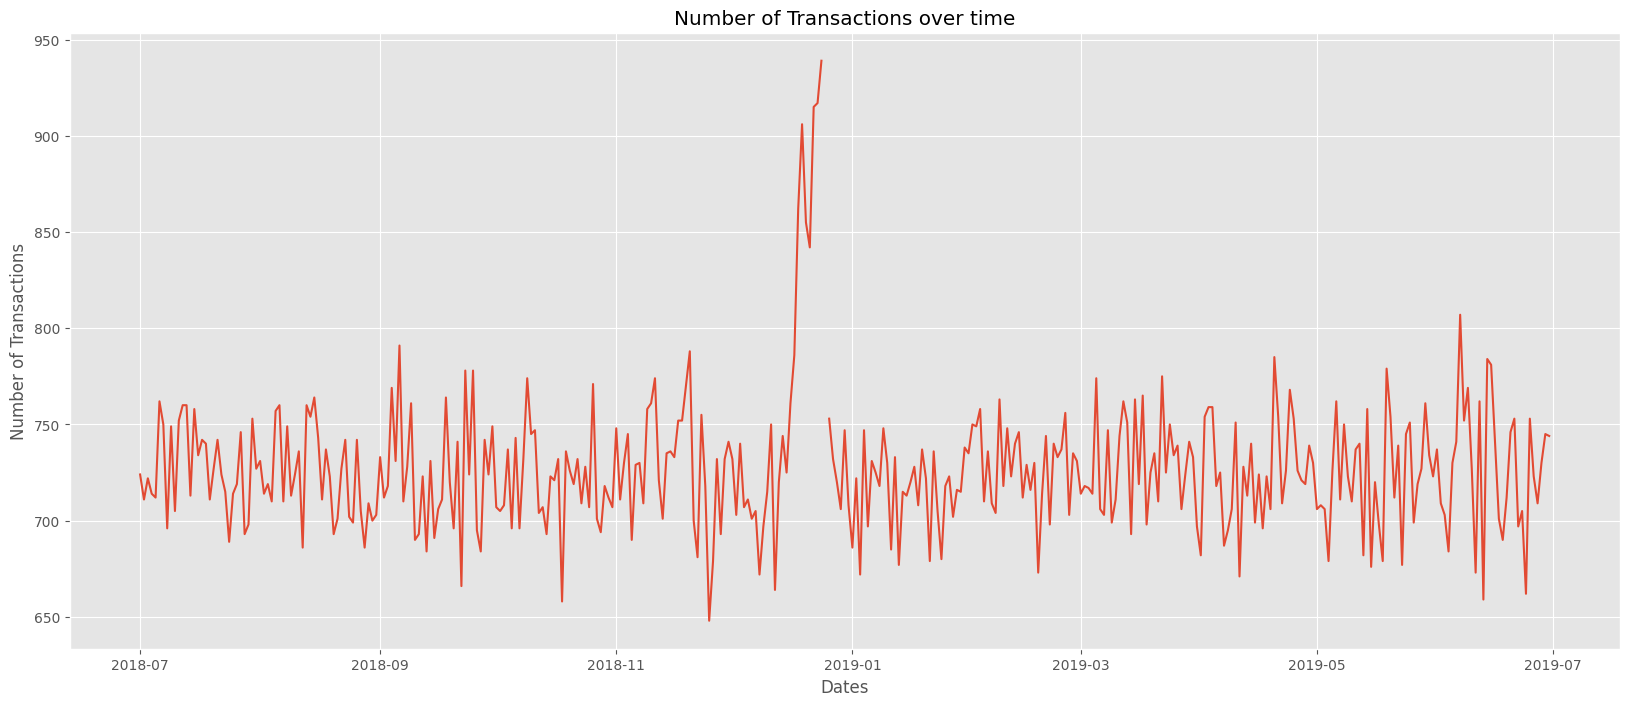

In [33]:
# Plot to visualize the number of transactions over time

plt.figure(figsize=(20,8))
plt.plot(missing_date_trans['Date'], missing_date_trans['Num_Transactions'])
plt.xlabel("Dates")  
plt.ylabel("Number of Transactions")  
plt.title("Number of Transactions over time")  
plt.show()

<b>We can see that there is an increase in purchases in December and a break in late December.</b> We need to zoom in <b> Decembers sales / transactions </b>for the chain of stores.

In [34]:
start = datetime.strptime("2018-12-01", "%Y-%m-%d")
end = datetime.strptime("2018-12-31", "%Y-%m-%d")
december_dates = (missing_date_trans['Date'] >= start) & (missing_date_trans['Date'] <= end)

In [35]:
december_trans = missing_date_trans.loc[december_dates]

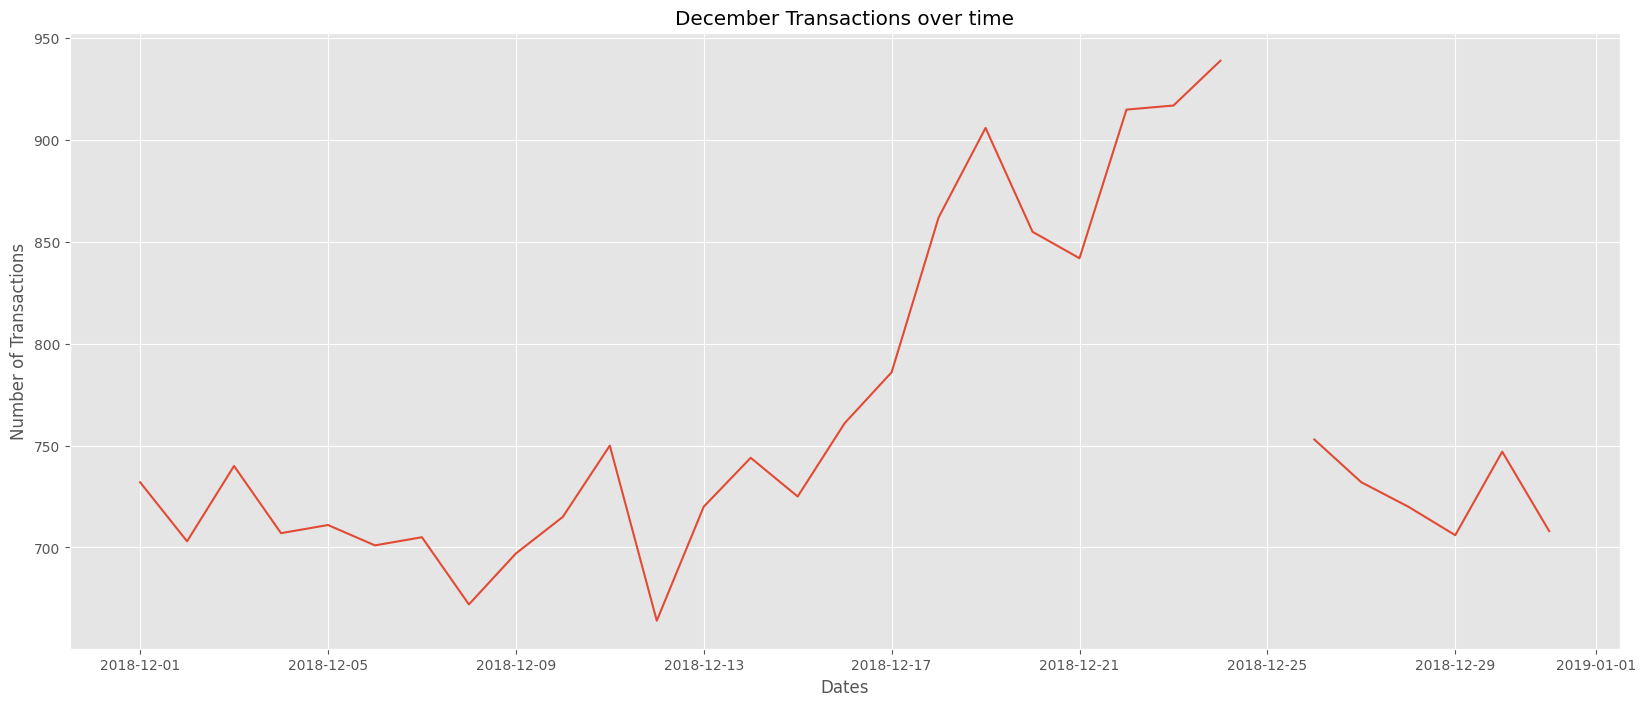

In [36]:
# Plot to visualize the number of transactions over time in December

plt.figure(figsize=(20,8))
plt.plot(december_trans['Date'], december_trans['Num_Transactions'])
plt.xlabel("Dates")  
plt.ylabel("Number of Transactions")  
plt.title("December Transactions over time")  
plt.show()

An increase in purchases is observed in December that leads upto Christmas and there are zero sales in Christmas itself. The reason for 0 Sales on Chirstmas being shops are closed on Christmas day.

The data has no outliers now. We will create a feature <b>pack_size</b> by extracting the numbers from PROD_NAME column to get more insights about the products which the customers tend to purchase

In [37]:
# Pack Size 
#the extract_pack_size function is designed to extract the pack size from a given string using regular expressions. If digits are found in the string, it returns the extracted pack size as a string. If no digits are found, it returns '0' as a default pack size value.
def extract_pack_size(cols):
    pack = cols[0]
    
    # Regular expressions to extract digits 
    
    list_match = re.findall(r'\d+',pack.lower())
    if len(list_match)==0:
        return '0'
    else :
        return re.findall(r'\d+',pack)[0]

In [38]:
# Creating pack_size feature from PROD_NAME

trans['pack_size'] = trans[['PROD_NAME']].apply(extract_pack_size, axis=1)

In [39]:
trans = trans.astype({'pack_size' : int})

<b> Statistics of pack size of products purchase from the retail stores</b>

In [40]:
trans['pack_size'].describe()

count    264834.000000
mean        182.425512
std          64.325148
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: pack_size, dtype: float64

<b> We need to check whether the pack sizes are sensible and also have a look at the most popular pack size in the retail stores</b>

In [41]:
trans_by_pack_size = trans[['pack_size']].groupby(['pack_size']).size().reset_index()

In [42]:
trans_by_pack_size.rename(columns={0: 'Num_Transactions'}, inplace=True)

In [43]:
trans_by_pack_size.head(10)

,pack_size,Num_Transactions
0,70,1507
1,90,3008
2,110,22387
3,125,1454
4,134,25102
5,135,3257
6,150,43131
7,160,2970
8,165,15297
9,170,19983


**1.Popular Pack Sizes:** Pack sizes such as 110, 134, 150, 165, and 170 are quite popular, as indicated by the relatively high number of transactions associated with them. This suggests that these pack sizes are preferred or commonly purchased by customers.

**2.Less Popular Pack Sizes:** On the other hand, pack sizes like 70, 90, 125, and 135 have lower numbers of transactions compared to the popular pack sizes. This could mean that these pack sizes are less commonly purchased or have limited demand.

**3.Impact on Sales:** The popularity of pack sizes can have a significant impact on sales revenue. Products with popular pack sizes may contribute more to overall sales, while less popular pack sizes might have a smaller contribution.

**4.Inventory Management:** Understanding the popularity of pack sizes is crucial for inventory management. It helps retailers and manufacturers optimize their stock levels by ensuring they have enough of the popular pack sizes in stock while avoiding excess inventory of less popular sizes.

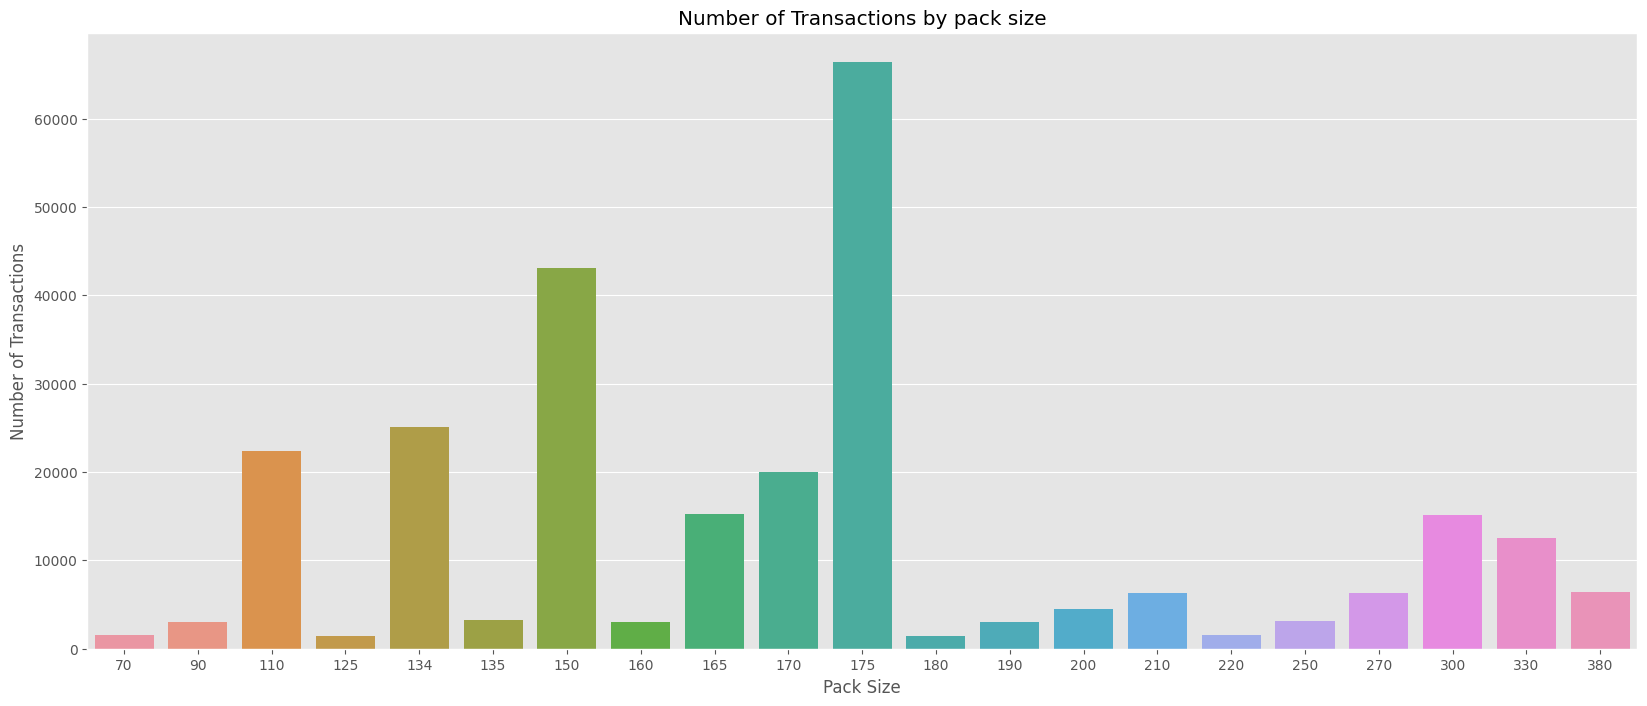

In [44]:
#plot a histogram of PACK_SIZE

plt.figure(figsize=(20,8))

sns.barplot(x='pack_size', y='Num_Transactions', data=trans_by_pack_size)
plt.xlabel("Pack Size")  
plt.ylabel("Number of Transactions")  
plt.title("Number of Transactions by pack size")  
plt.show()

The largest pack size is 380 and the smallest pack is 70

Pack sizes created look reasonable and now to create brands, we can use the first word in PROD_NAME to
work out the brand name

In [45]:
# Function to extract brand name from product name
# Parameters:
#   - cols: a list or Series containing product names
# Returns:
#   - The extracted brand name as a string or 'None' if no brand name is found
def get_brand(cols):
    # Extract the product name from the input
    prod_name = cols[0]
    
    # Use regular expressions to find the brand name (sequence of letters followed by a space)
    brand_name = re.findall(r'[A-Za-z]+\s', prod_name.strip())
    
    # If no brand name is found, return 'None'; otherwise, return the first brand name found
    if len(brand_name) == 0:
        return 'None'
    else:
        return brand_name[0]

    

In [46]:
trans['brand'] = trans[['PROD_NAME']].apply(get_brand, axis=1)

In [47]:
# Checking the brands

trans[['PROD_NAME', 'brand']].drop_duplicates()

,PROD_NAME,brand
0,Natural Chip Compny SeaSalt175g,Natural
1,CCs Nacho Cheese 175g,CCs
2,Smiths Crinkle Cut Chips Chicken 170g,Smiths
3,Smiths Chip Thinly S/Cream&Onion 175g,Smiths
4,Kettle Tortilla ChpsHny&Jlpno Chili 150g,Kettle
...,...,...
520,Red Rock Deli Chikn&Garlic Aioli 150g,Red
521,RRD SR Slow Rst Pork Belly 150g,RRD
528,RRD Pc Sea Salt 165g,RRD
549,Smith Crinkle Cut Bolognese 150g,Smith


In [48]:
print('Total Records in Transaction Dataset : {}'.format(trans.shape[0]))

Total Records in Transaction Dataset : 264834


# 2. Purchase Behaviour of Customers

In [49]:
# Checking the customer data

purchase.head(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


In [50]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


<b>Checking for missing values in the dataset</b>

In [51]:
purchase.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [52]:
print('Total Number of records : {}'.format(purchase.shape[0]))
print('Total Number of unique customers : {}'.format(purchase['LYLTY_CARD_NBR'].drop_duplicates().shape[0]))

Total Number of records : 72637
Total Number of unique customers : 72637


There are no duplicate customers in the dataset

In [53]:
# Checking LIFESTAGE column

purchase['LIFESTAGE'].value_counts().reset_index()

,LIFESTAGE,count
0,RETIREES,14805
1,OLDER SINGLES/COUPLES,14609
2,YOUNG SINGLES/COUPLES,14441
3,OLDER FAMILIES,9780
4,YOUNG FAMILIES,9178
5,MIDAGE SINGLES/COUPLES,7275
6,NEW FAMILIES,2549


In [54]:
# Checking PREMIUM_CUSTOMER column

purchase['PREMIUM_CUSTOMER'].value_counts().reset_index()

,PREMIUM_CUSTOMER,count
0,Mainstream,29245
1,Budget,24470
2,Premium,18922


There are no data issues in the customer data. Hence we can <b> merge the customer (purchase) data and the transactions dataset</b> 

In [55]:
data = pd.merge(trans, purchase, left_on = 'LYLTY_CARD_NBR', right_on='LYLTY_CARD_NBR', how='left')

In [56]:
data.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,date_modified,pack_size,brand,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-14,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-17,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-18,150,Kettle,MIDAGE SINGLES/COUPLES,Budget
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,2019-05-19,300,Old,MIDAGE SINGLES/COUPLES,Budget
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,2019-05-16,330,Smiths,MIDAGE SINGLES/COUPLES,Budget
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6,2019-05-16,210,Grain,MIDAGE SINGLES/COUPLES,Budget
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,2018-08-20,150,Doritos,MIDAGE SINGLES/COUPLES,Budget
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,2018-08-18,210,Grain,MIDAGE SINGLES/COUPLES,Budget


In [57]:
data.drop(columns={'DATE'}, inplace=True)

In [58]:
print('Total Transactions :{}'.format(trans.shape[0]))
print('Total records in data :{}'.format(data.shape[0]))

Total Transactions :264834
Total records in data :264834


In [59]:
data[data['TXN_ID'].isnull()]

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,date_modified,pack_size,brand,LIFESTAGE,PREMIUM_CUSTOMER


In [60]:
data.isnull().sum()

STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
date_modified       0
pack_size           0
brand               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

There are no missing values in the data set. Hence we can export the data into a <b>csv</b> file for further analysis.

In [61]:
# Exporting the data into a csv file

data.to_csv('Customer_Purchase_Behaviour_data.csv', index=False)